<a href="https://colab.research.google.com/github/seohyeon-lee-2025/network_of_rings/blob/main/network_of_thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

#characters_df = pd.read_csv('/content/lotr_characters.csv')

In [3]:
'''
  get list of main characters of LOTR
    char_list = []
    create dictionary with main character names as keys
    create subdictionary for each 
    parse text. 
    if word in char_list:
      pick out the sentence. 
      add all other names (if any) in the same sentence as keys to subdictionary. 
      if a name is already in the subdictionary, value++
      else, subdict[name] = 1
    
    use this dictionary to create and define edges below

'''
#char_list = characters_df.name
char_list_simple = ["Sauron", "Treebeard", "Arwen", "Galadriel", "Elrond", "Merry", "Gimli", "Pippin", "Grima", "Theoden", "Eowyn", "Frodo", "Legolas", "Bilbo", "Samwise", "Saruman", "Gollum", "Aragorn", "Gandalf"]
char_set_simple = set(char_list_simple)

In [4]:
network_d = {}
 
# initialize dictionary with character names. values are dictionaries on their own
for item in char_list_simple:
    network_d[item] = {}

print(network_d)

{'Sauron': {}, 'Treebeard': {}, 'Arwen': {}, 'Galadriel': {}, 'Elrond': {}, 'Merry': {}, 'Gimli': {}, 'Pippin': {}, 'Grima': {}, 'Theoden': {}, 'Eowyn': {}, 'Frodo': {}, 'Legolas': {}, 'Bilbo': {}, 'Samwise': {}, 'Saruman': {}, 'Gollum': {}, 'Aragorn': {}, 'Gandalf': {}}


In [5]:
f = open("book1.txt", "r", encoding = "ISO-8859-1")

f_lst = []
while True:
 
    # Get next line from file
    line = f.readline()
    f_lst.append(line.strip())
 
    # if line is empty
    # end of file is reached
    if not line:
        break

f_lst[:5]


['Three Rings for the Elven-kings under the sky,',
 'Seven for the Dwarf-lords in their halls of stone,',
 'Nine for Mortal Men doomed to die,',
 'One for the Dark Lord on his dark throne',
 'In the Land of Mordor where the Shadows lie.']

In [6]:
import string
for line in f_lst:
  if (len(line) > 0):
    line = line.translate(str.maketrans('', '', string.punctuation))
    line_set = set(line.split(" "))
   # print(line_set)
    #take intersection between character list and words in this
    intersection = line_set.intersection(char_set_simple)
    #print(intersection)

#if 2 or more characters are mentioned together in one line
    if (len(intersection) >1):
      #print(len(intersection))
      #loop through intersection
      for word in intersection:
        #add all other characters in intersection to subdictionary of each character
        for subitem in intersection:
          if subitem != word:
            if word not in network_d[subitem].keys(): #if we did [frodo][bilbo] then we shouldn't create [bilbo][frodo]
              if subitem in network_d[word].keys():
                network_d[word][subitem] += 1
              else: network_d[word][subitem]=1
         


print(network_d)

print(network_d['Aragorn'])
print(network_d['Arwen'])
print(network_d['Galadriel'])


{'Sauron': {}, 'Treebeard': {}, 'Arwen': {'Aragorn': 4, 'Frodo': 4, 'Elrond': 3}, 'Galadriel': {'Elrond': 2, 'Sauron': 2, 'Frodo': 7, 'Gandalf': 3, 'Aragorn': 2, 'Legolas': 2, 'Gimli': 3}, 'Elrond': {'Gandalf': 25, 'Bilbo': 10, 'Frodo': 22, 'Gollum': 2, 'Sauron': 8}, 'Merry': {'Frodo': 61, 'Gandalf': 11, 'Aragorn': 7, 'Legolas': 8, 'Elrond': 2}, 'Gimli': {'Legolas': 21, 'Frodo': 18, 'Aragorn': 11, 'Bilbo': 1, 'Gandalf': 19, 'Sauron': 1, 'Merry': 6, 'Elrond': 1}, 'Pippin': {'Merry': 52, 'Frodo': 70, 'Gandalf': 18, 'Elrond': 4, 'Gimli': 6, 'Aragorn': 5, 'Legolas': 8}, 'Grima': {}, 'Theoden': {}, 'Eowyn': {}, 'Frodo': {'Gollum': 13, 'Gandalf': 113, 'Sauron': 2}, 'Legolas': {'Frodo': 21, 'Gollum': 2, 'Gandalf': 8, 'Aragorn': 19, 'Elrond': 1}, 'Bilbo': {'Frodo': 81, 'Gandalf': 38, 'Gollum': 19, 'Pippin': 3, 'Merry': 7, 'Aragorn': 4, 'Legolas': 1}, 'Samwise': {'Elrond': 1, 'Bilbo': 1, 'Frodo': 1, 'Gollum': 1}, 'Saruman': {'Sauron': 7, 'Gollum': 2, 'Bilbo': 2, 'Frodo': 5, 'Elrond': 4, 'Gandal

In [55]:
val_list = []

for key in network_d.keys():
    for subkey in network_d[key]:
        print(key, subkey, network_d[key][subkey])
        val_list.append(network_d[key][subkey])




Arwen Aragorn 4
Arwen Frodo 4
Arwen Elrond 3
Galadriel Elrond 2
Galadriel Sauron 2
Galadriel Frodo 7
Galadriel Gandalf 3
Galadriel Aragorn 2
Galadriel Legolas 2
Galadriel Gimli 3
Elrond Gandalf 25
Elrond Bilbo 10
Elrond Frodo 22
Elrond Gollum 2
Elrond Sauron 8
Merry Frodo 61
Merry Gandalf 11
Merry Aragorn 7
Merry Legolas 8
Merry Elrond 2
Gimli Legolas 21
Gimli Frodo 18
Gimli Aragorn 11
Gimli Bilbo 1
Gimli Gandalf 19
Gimli Sauron 1
Gimli Merry 6
Gimli Elrond 1
Pippin Merry 52
Pippin Frodo 70
Pippin Gandalf 18
Pippin Elrond 4
Pippin Gimli 6
Pippin Aragorn 5
Pippin Legolas 8
Frodo Gollum 13
Frodo Gandalf 113
Frodo Sauron 2
Legolas Frodo 21
Legolas Gollum 2
Legolas Gandalf 8
Legolas Aragorn 19
Legolas Elrond 1
Bilbo Frodo 81
Bilbo Gandalf 38
Bilbo Gollum 19
Bilbo Pippin 3
Bilbo Merry 7
Bilbo Aragorn 4
Bilbo Legolas 1
Samwise Elrond 1
Samwise Bilbo 1
Samwise Frodo 1
Samwise Gollum 1
Saruman Sauron 7
Saruman Gollum 2
Saruman Bilbo 2
Saruman Frodo 5
Saruman Elrond 4
Saruman Gandalf 6
Saruman 

(array([20.,  5.,  5.,  3.,  3.,  5.,  4.,  0.,  4.,  1.,  1.,  0.,  0.,
         0.,  0.,  2.,  3.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1.  ,   2.12,   3.24,   4.36,   5.48,   6.6 ,   7.72,   8.84,
          9.96,  11.08,  12.2 ,  13.32,  14.44,  15.56,  16.68,  17.8 ,
         18.92,  20.04,  21.16,  22.28,  23.4 ,  24.52,  25.64,  26.76,
         27.88,  29.  ,  30.12,  31.24,  32.36,  33.48,  34.6 ,  35.72,
         36.84,  37.96,  39.08,  40.2 ,  41.32,  42.44,  43.56,  44.68,
         45.8 ,  46.92,  48.04,  49.16,  50.28,  51.4 ,  52.52,  53.64,
  

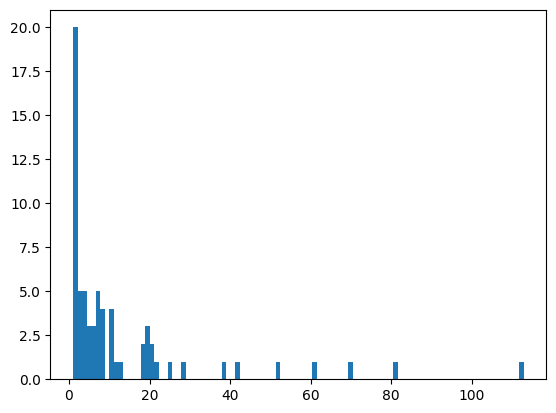

In [61]:
#histogram of distribution of edge weights
import matplotlib.pyplot as plt

plt.hist(x = val_list, bins = 100)

[3, 13, 14, 14, 7, 7, 12, 10, 10, 11, 8, 8, 8, 4, 7]


{'whiskers': [<matplotlib.lines.Line2D at 0x137ace0e0>,
 'caps': [<matplotlib.lines.Line2D at 0x137ace620>,
 'boxes': [<matplotlib.lines.Line2D at 0x137acde70>],
 'medians': [<matplotlib.lines.Line2D at 0x137aceb60>],
 'fliers': [<matplotlib.lines.Line2D at 0x137acee00>],
 'means': []}

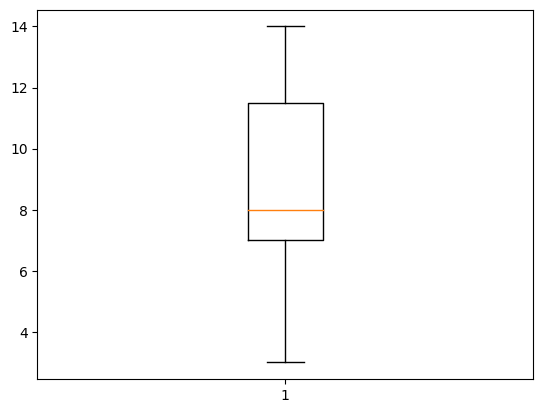

In [73]:
#box distribution of node degrees
deg_list = [G.degree[v] for v in G.nodes]
print([G.degree[v] for v in G.nodes]) # omits 0's

#plt.hist(x = deg_list)
plt.boxplot(x = deg_list)

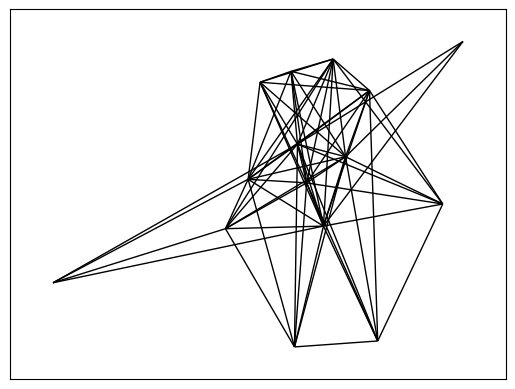

In [36]:

import networkx as nx

G = nx.Graph()

for key in network_d.keys():
    for subkey in network_d[key]:
        G.add_edge(key, subkey, weight = network_d[key][subkey])


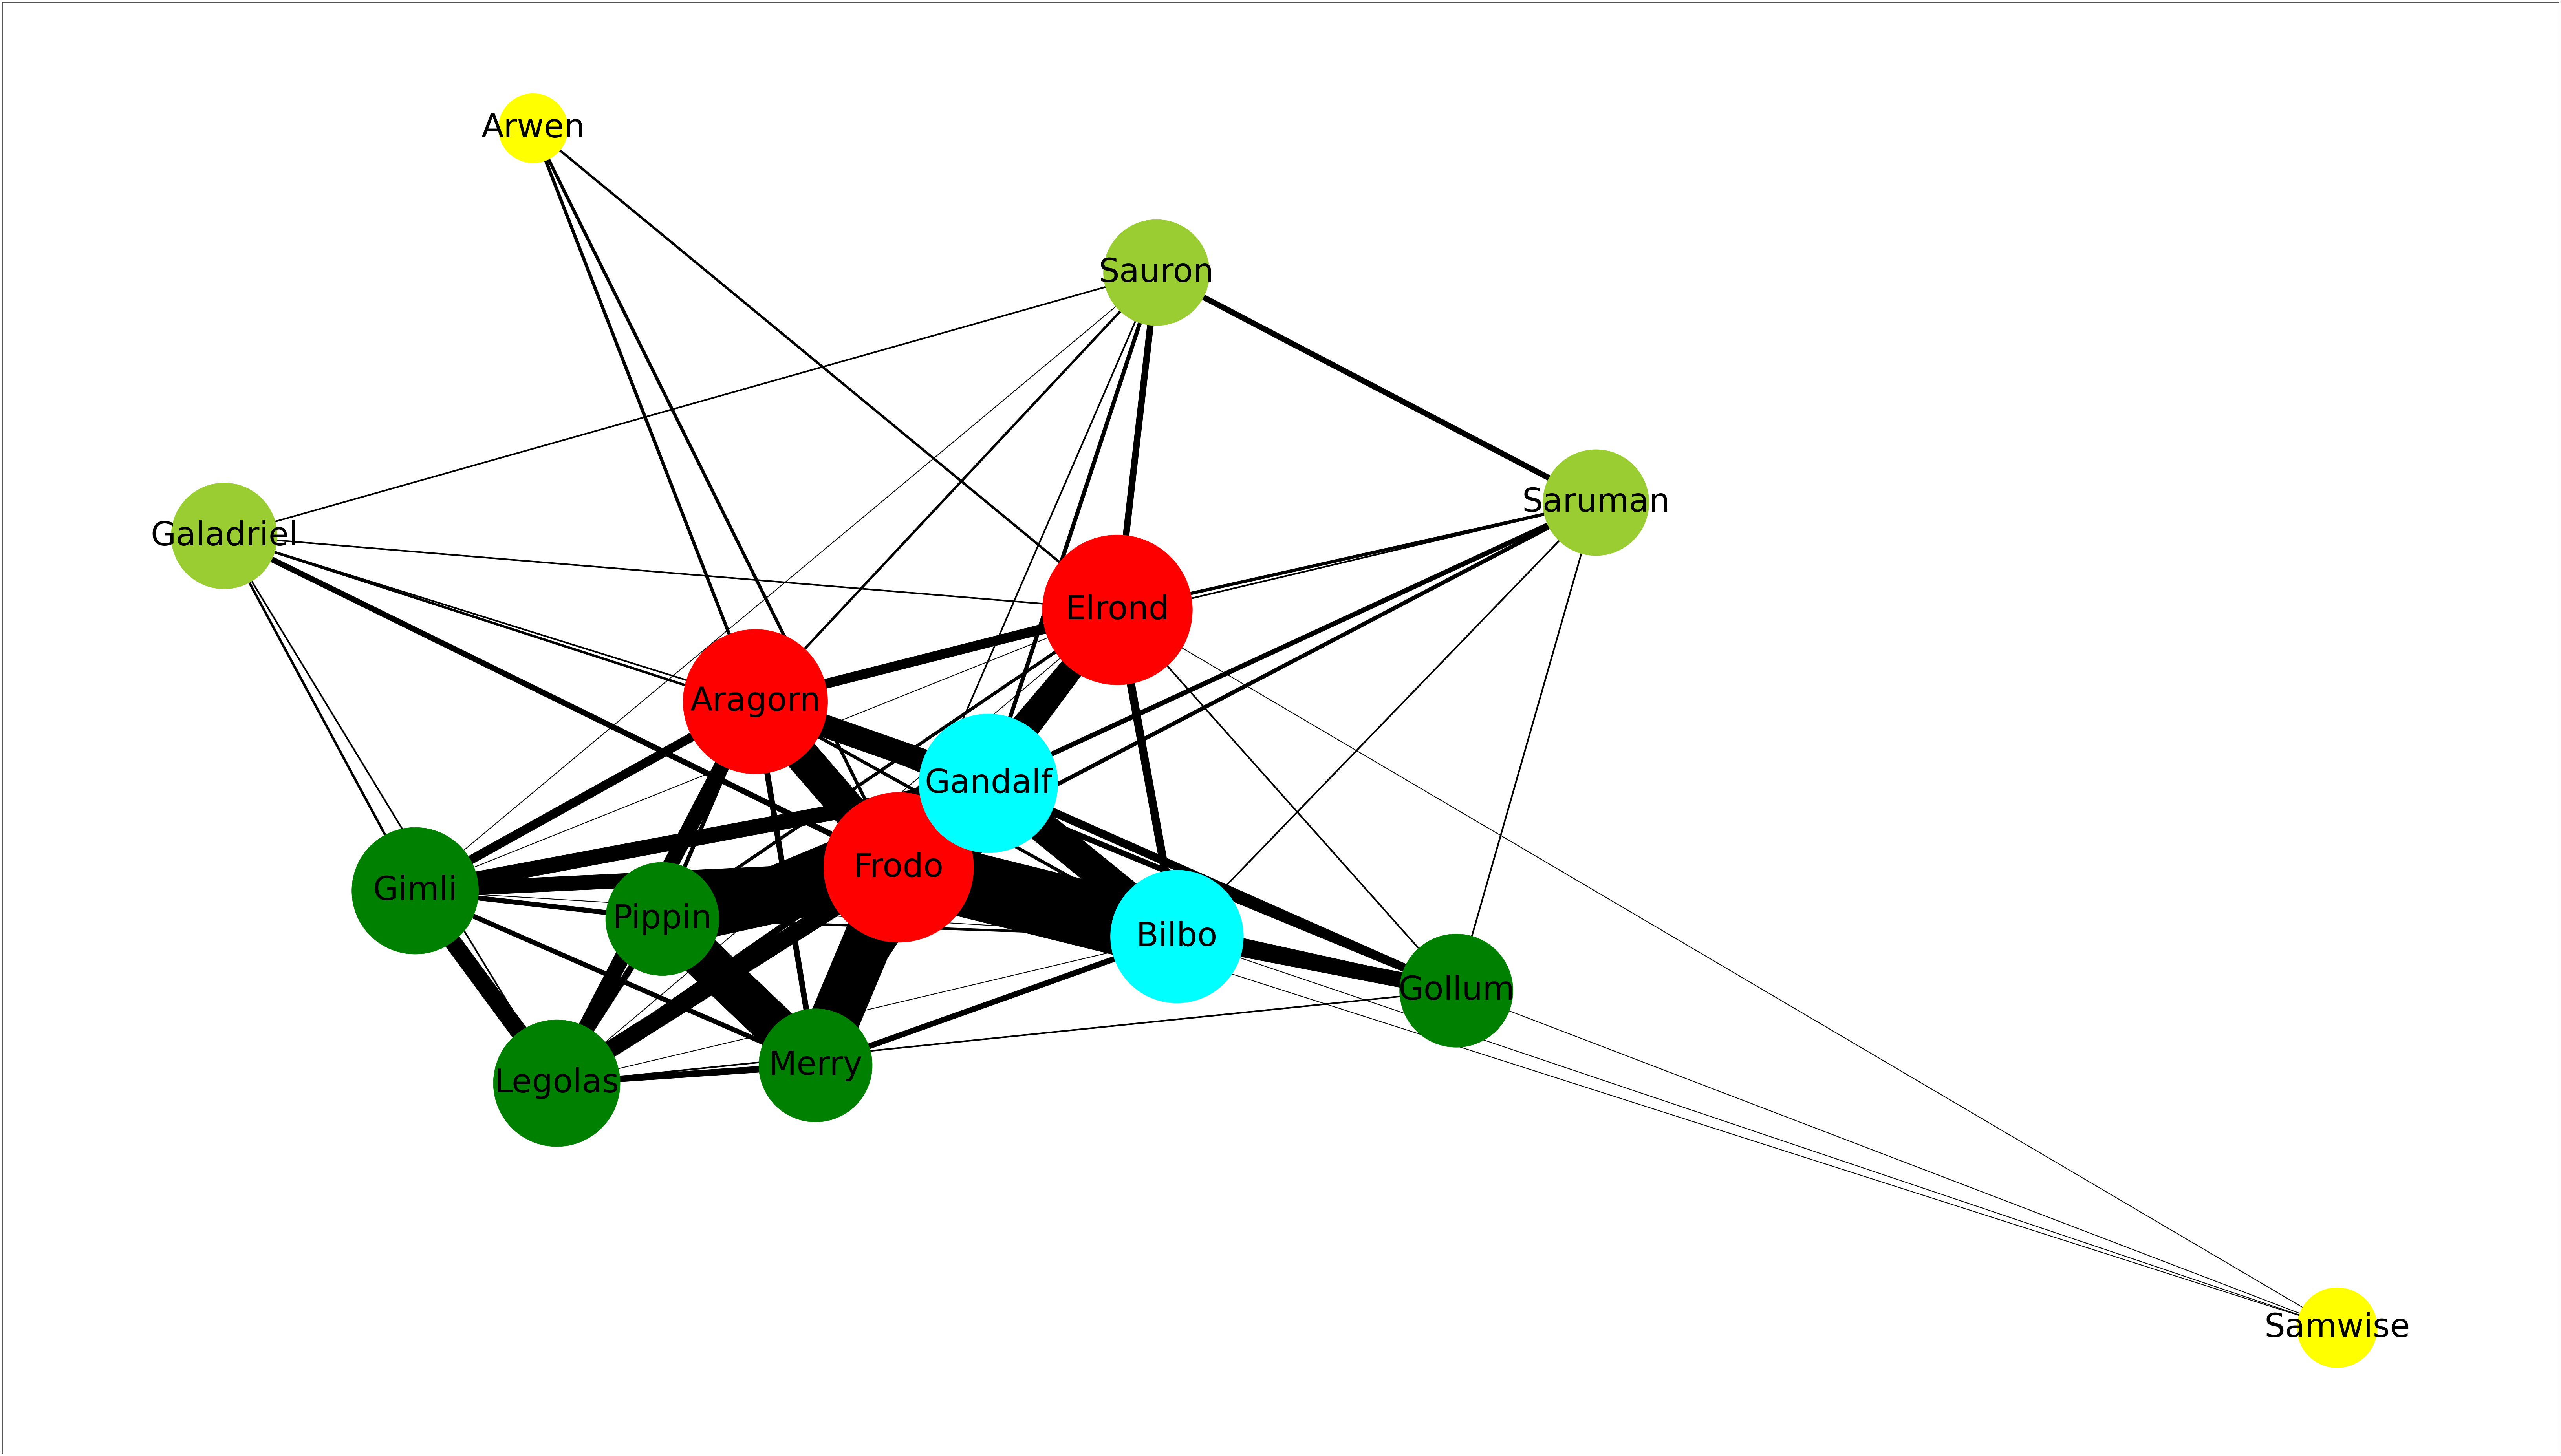

In [97]:
#set up pos
fig = plt.figure(1, figsize=(140, 80), dpi=60)
pos=nx.spring_layout(G, scale = 10)

edges = G.edges()
weights = [G[u][v]['weight']*2.5 for u,v in edges]

node_size = [G.degree[v]*15000 for v in G.nodes]
node_color = []

color_map = []
for node in G:
    if G.degree[node] < 7: #below lower quartile
        color_map.append('yellow')
    elif G.degree[node] < 8: 
        color_map.append('yellowgreen')   
    elif G.degree[node] < 11:
        color_map.append('green')
    elif G.degree[node] < 13:
        color_map.append('cyan')
    else:
        color_map.append('red')

nx.draw_networkx(G, pos, edgelist=edges, width=weights, node_size = node_size, node_color = color_map, font_size = 100)

#edge thickness proportional to weight
#node size proportional to degree


#if deg = 0 appear as empty node



In [15]:
#probability spring 2023 final project

import random
import networkx as nx
import numpy as np
from community import community_louvain
import matplotlib.pyplot as plt


def generate_network(graph_dct):
    '''
    This function will generate network associated to the user specifed
    number of nodes. 

  
    
    params:
        n (Integer) : The number of nodes you want in your network
    
    returns:
        A networkX multi-graph
        
    example:
        G = generate_network(n)
    '''
    # initialize dictionary with nodes
    nodes = graph_dct.keys()
    E = 0
    
    # generate edges
    for key, subdict in graph_dct.items():
        el = random.sample(nodes, edge_c)
        graph_dct[n] = el
    
    # create networkx multi-edge graph
    G = nx.MultiGraph(graph_dct)
    return G

n = 500
NG = generate_network(network_d)
print(nx.info(NG))

# visualize graph
pos = nx.spring_layout(NG)
nx.draw(G, pos, node_size = 75, alpha = 0.8)
plt.show()

NameError: name 'edge_c' is not defined